In [5]:
import scanpy
import numpy as np
import pandas as pd
import phate

## Explore data object

In [6]:
data = scanpy.read_h5ad('Body_wall_muscle.h5ad')
data.to_df() ## Expression dataframe (cells x genes)

,WBGene00010957,WBGene00010958,WBGene00010959,WBGene00010960,WBGene00010961,WBGene00000829,WBGene00010962,WBGene00010963,WBGene00010964,WBGene00010965,...,WBGene00001787,WBGene00001779,WBGene00013175,WBGene00001783,WBGene00021598,WBGene00021597,WBGene00021596,WBGene00021595,WBGene00021594,WBGene00007064
Waterston_300_minutes+AAACCTGAGACAATAC-300.1.1,5.0,0.0,0.0,7.0,3.0,5.0,8.0,3.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Waterston_300_minutes+AAACCTGAGTTGAGTA-300.1.1,26.0,1.0,14.0,52.0,5.0,17.0,38.0,6.0,17.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Waterston_300_minutes+AAACCTGGTCTGGAGA-300.1.1,12.0,0.0,5.0,8.0,2.0,1.0,11.0,0.0,3.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Waterston_300_minutes+AAACCTGGTTATGCGT-300.1.1,11.0,0.0,9.0,5.0,0.0,3.0,11.0,3.0,7.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Waterston_300_minutes+AAACGGGTCGTTACGA-300.1.1,5.0,1.0,1.0,10.0,0.0,5.0,7.0,2.0,3.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Murray_b02+TTTACTGGTACCGTAT-b02,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Murray_b02+TTTACTGTCGGATGGA-b02,14.0,0.0,3.0,15.0,0.0,0.0,9.0,2.0,5.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Murray_b02+TTTATGCCATGCTGGC-b02,40.0,1.0,8.0,26.0,4.0,6.0,26.0,6.0,19.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Murray_b02+TTTATGCGTAAGCACG-b02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
data

AnnData object with n_obs × n_vars = 17520 × 16620
    obs: 'study', 'batch', 'sample', 'sample_description', 'barcode', 'cell_type', 'n_umi', 'time_point', 'size_factor', 'cell_subtype', 'plot_cell_type', 'raw_embryo_time', 'embryo_time', 'embryo_time_bin', 'raw_embryo_time_bin', 'lineage', 'passed_qc', 'sample_batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'cell_type_simple', 'Fiedler_vector', 'discretized'
    var: 'gene_id', 'gene_name', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'cell_type_colors', 'cell_type_simple_colors', 'discretized_colors'
    obsm: 'X_pca', 'X_phate'

In [9]:
data.obs.time_point

Waterston_300_minutes+AAACCTGAGACAATAC-300.1.1    300_minutes
Waterston_300_minutes+AAACCTGAGTTGAGTA-300.1.1    300_minutes
Waterston_300_minutes+AAACCTGGTCTGGAGA-300.1.1    300_minutes
Waterston_300_minutes+AAACCTGGTTATGCGT-300.1.1    300_minutes
Waterston_300_minutes+AAACGGGTCGTTACGA-300.1.1    300_minutes
                                                     ...     
Murray_b02+TTTACTGGTACCGTAT-b02                         mixed
Murray_b02+TTTACTGTCGGATGGA-b02                         mixed
Murray_b02+TTTATGCCATGCTGGC-b02                         mixed
Murray_b02+TTTATGCGTAAGCACG-b02                         mixed
Murray_b02+TTTATGCTCGTACGGC-b02                         mixed
Name: time_point, Length: 17520, dtype: category
Categories (4, object): ['300_minutes', '400_minutes', '500_minutes', 'mixed']

In [10]:
data.obs.embryo_time_bin

Waterston_300_minutes+AAACCTGAGACAATAC-300.1.1    330-390
Waterston_300_minutes+AAACCTGAGTTGAGTA-300.1.1    270-330
Waterston_300_minutes+AAACCTGGTCTGGAGA-300.1.1    270-330
Waterston_300_minutes+AAACCTGGTTATGCGT-300.1.1    330-390
Waterston_300_minutes+AAACGGGTCGTTACGA-300.1.1    330-390
                                                   ...   
Murray_b02+TTTACTGGTACCGTAT-b02                   450-510
Murray_b02+TTTACTGTCGGATGGA-b02                   450-510
Murray_b02+TTTATGCCATGCTGGC-b02                   270-330
Murray_b02+TTTATGCGTAAGCACG-b02                   510-580
Murray_b02+TTTATGCTCGTACGGC-b02                   580-650
Name: embryo_time_bin, Length: 17520, dtype: category
Categories (10, object): ['130-170', '170-210', '210-270', '270-330', ..., '450-510', '510-580', '580-650', '> 650']

In [4]:
data.var ## information for each gene

,gene_id,gene_name,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
WBGene00010957,WBGene00010957,nduo-6,17126,16.095833,2.838835,2.248858,281999.0,12.549663
WBGene00010958,WBGene00010958,ndfl-4,6753,0.615354,0.479554,61.455479,10781.0,9.285633
WBGene00010959,WBGene00010959,nduo-1,16248,6.935502,2.071347,7.260274,121510.0,11.707760
WBGene00010960,WBGene00010960,atp-6,17065,17.328083,2.908434,2.597032,303588.0,12.623430
WBGene00010961,WBGene00010961,nduo-2,11712,1.567922,0.943097,33.150685,27470.0,10.220886
...,...,...,...,...,...,...,...,...
WBGene00021597,WBGene00021597,spsb-1,226,0.013813,0.013718,98.710046,242.0,5.493062
WBGene00021596,WBGene00021596,spsb-2,121,0.007534,0.007506,99.309361,132.0,4.890349
WBGene00021595,WBGene00021595,Y46E12BL.2,1675,0.109817,0.104195,90.439498,1924.0,7.562681
WBGene00021594,WBGene00021594,tig-3,26,0.001598,0.001597,99.851598,28.0,3.367296


In [5]:
data.obsm['X_pca'].shape ## Dimensionality-reduced with PCA

(17520, 100)

In [6]:
data.obsm['X_phate'].shape ## Dimensionality-reduced with PHATE

(17520, 2)

## Plot PCA colored by pseudotime (Fiedler vector of graph) and discretized time (Fiedler vector binned into 10 bins)

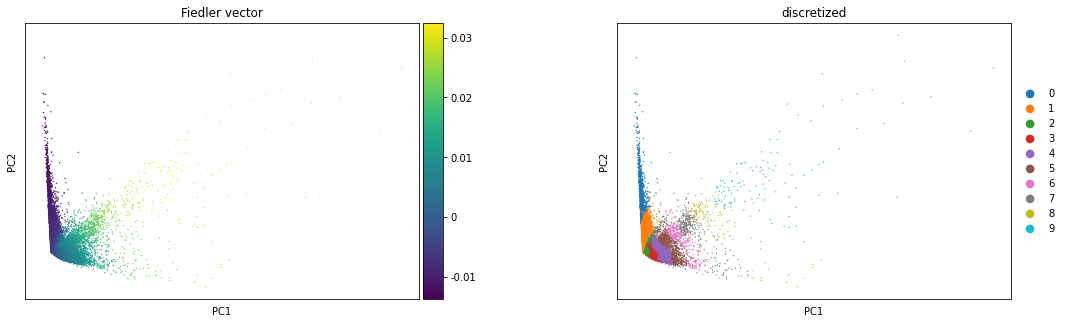

In [7]:
scanpy.pl.scatter(data, basis='pca', color=['Fiedler_vector', 'discretized'])

## Plot PHATE colored by pseudotime (Fiedler vector of graph) and discretized time (Fiedler vector binned into 10 bins)

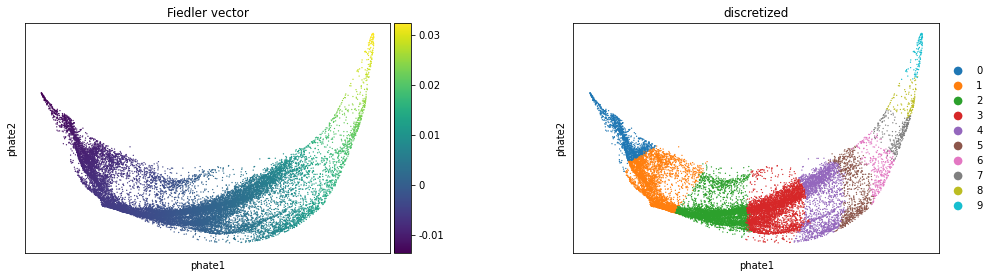

In [8]:
scanpy.pl.scatter(data, basis='phate', color=['Fiedler_vector', 'discretized']) ## Plot PHATE colored by time

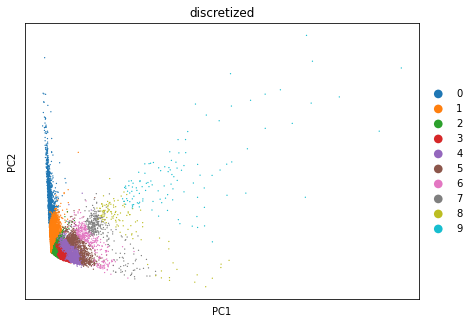

In [11]:
scanpy.pl.scatter(data, basis='pca', color=['discretized'])